In [172]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

In [173]:
df = pd.read_csv("./Dataset/heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [174]:
Y = df['HeartDisease']
df.drop(columns='HeartDisease', inplace=True)

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

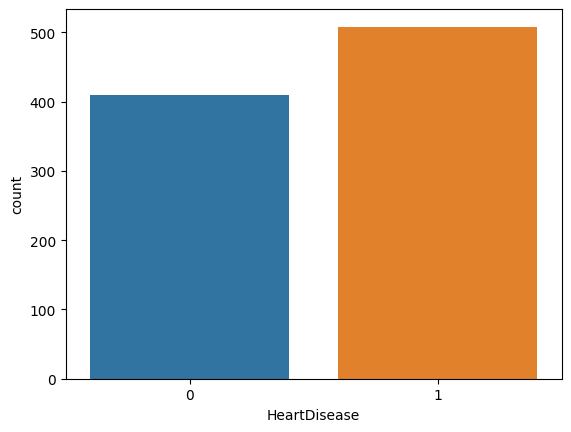

In [175]:
sns.countplot(x=Y)

<AxesSubplot:xlabel='HeartDisease', ylabel='count'>

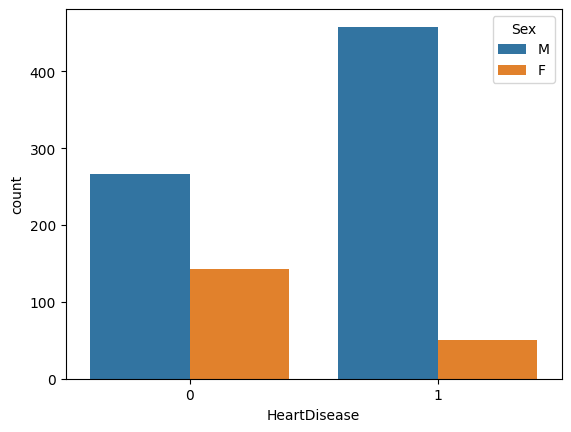

In [176]:
sns.countplot(x=Y, hue=df['Sex'])

In [177]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
dtype: int64

In [178]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
dtypes: float64(1), int64(5), object(5)
memory usage: 79.0+ KB


## *Scaling the Numerical Features*

In [179]:
Numerical_attr = []

for i in df.columns:
    if df[i].dtype != object:
        Numerical_attr.append(i)
Numerical_attr.remove('FastingBS')



In [180]:
from sklearn.preprocessing import StandardScaler

In [181]:
print(Numerical_attr)
for i in Numerical_attr:
    scaler = StandardScaler()
    scaled = scaler.fit_transform(df[[i]])
    df[i] = scaled


['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


<AxesSubplot:>

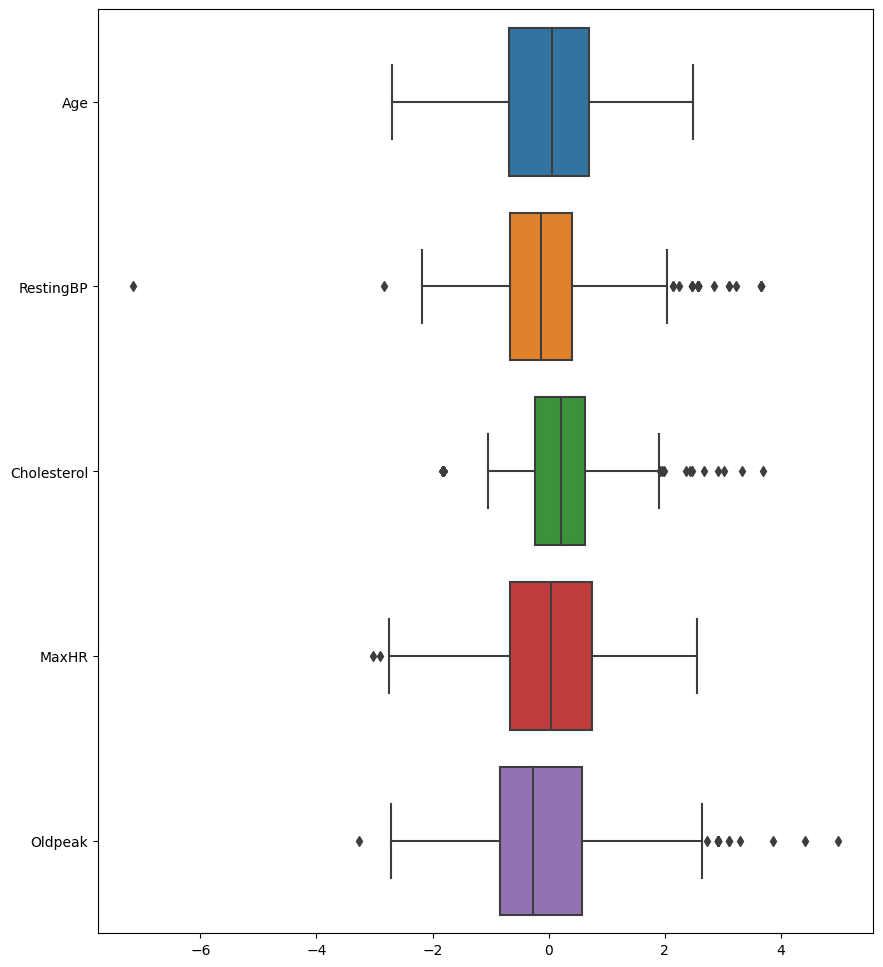

In [182]:
plt.figure(figsize=(10,12))
sns.boxplot(df[Numerical_attr], orient='h')

In [183]:
df['FastingBS'].value_counts()

0    704
1    214
Name: FastingBS, dtype: int64

-1.0836163726188892e-16
1.9543795291876393e-16
0.0
4.95367484625778e-16
1.238418711564445e-16


<AxesSubplot:>

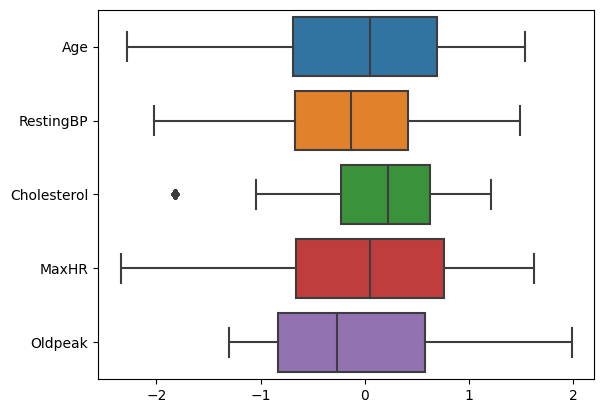

In [184]:
def Outliers(attri):
    mean = attri.mean()
    print(mean)
    upper_threshold = attri.quantile(0.95)
    lower_threshold = attri.quantile(0.01)
    
    attri = attri.clip(upper=upper_threshold, lower=lower_threshold)
    return attri

for i in Numerical_attr:
    df[i] = Outliers(df[i])
sns.boxplot(df[Numerical_attr], orient='h')


-0.8826888697706151


<AxesSubplot:>

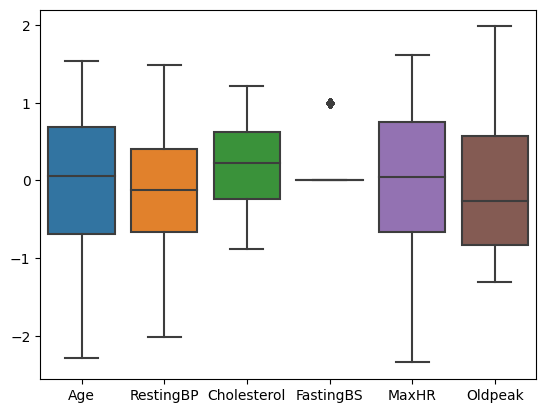

In [185]:
x = df['Cholesterol'].quantile(0.19)
print(x)
df['Cholesterol'].clip(lower=x, inplace=True)
sns.boxplot(df) 

## *Converting the Categorical Values to Integers*
1. Sex 
2. ChestPainType
3. RestingECG
4. ExerciseAngina
5. ST_Slope

In [186]:
Gender = pd.get_dummies(df['Sex']).drop(columns='F')
df.drop(columns='Sex', inplace=True)
df['Sex'] = Gender

In [187]:
df.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Sex
0,-1.433140,ATA,0.410909,0.825070,0,Normal,1.382928,N,-0.832432,Up,1
1,-0.478484,NAP,1.491752,-0.171961,0,Normal,0.754157,N,0.105664,Flat,0
2,-1.751359,ATA,-0.129513,0.770188,0,ST,-1.525138,N,-0.832432,Up,1
3,-0.584556,ASY,0.302825,0.139040,0,Normal,-1.132156,Y,0.574711,Flat,0
4,0.051881,NAP,0.951331,-0.034755,0,Normal,-0.581981,N,-0.832432,Up,1


In [188]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

In [189]:
ChestPainType = { 0 : 'ASY', 1 : 'NAP', 2 : 'ATA', 3 : 'TA' }


def Cat2Int(Arr_dict, Col):
    for i,val in Arr_dict.items():
        df[Col].replace(val, i, inplace=True)
        

Cat2Int(ChestPainType, "ChestPainType")
df.head()
        

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Sex
0,-1.433140,2,0.410909,0.825070,0,Normal,1.382928,N,-0.832432,Up,1
1,-0.478484,1,1.491752,-0.171961,0,Normal,0.754157,N,0.105664,Flat,0
2,-1.751359,2,-0.129513,0.770188,0,ST,-1.525138,N,-0.832432,Up,1
3,-0.584556,0,0.302825,0.139040,0,Normal,-1.132156,Y,0.574711,Flat,0
4,0.051881,1,0.951331,-0.034755,0,Normal,-0.581981,N,-0.832432,Up,1


In [190]:
df['RestingECG'].value_counts()

Normal    552
LVH       188
ST        178
Name: RestingECG, dtype: int64

In [191]:
RestingECG = { 0 : 'Normal', 1 : 'LVH', 2 : 'ST'}

Cat2Int(RestingECG, "RestingECG")
df.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Sex
0,-1.433140,2,0.410909,0.825070,0,0,1.382928,N,-0.832432,Up,1
1,-0.478484,1,1.491752,-0.171961,0,0,0.754157,N,0.105664,Flat,0
2,-1.751359,2,-0.129513,0.770188,0,2,-1.525138,N,-0.832432,Up,1
3,-0.584556,0,0.302825,0.139040,0,0,-1.132156,Y,0.574711,Flat,0
4,0.051881,1,0.951331,-0.034755,0,0,-0.581981,N,-0.832432,Up,1


In [192]:
df['ST_Slope'].value_counts()

Flat    460
Up      395
Down     63
Name: ST_Slope, dtype: int64

In [193]:
ST_Slope = { 0 : 'Flat', 1 : 'Up', 2 : 'Down'}

Cat2Int(ST_Slope, 'ST_Slope')
df.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,Sex
0,-1.433140,2,0.410909,0.825070,0,0,1.382928,N,-0.832432,1,1
1,-0.478484,1,1.491752,-0.171961,0,0,0.754157,N,0.105664,0,0
2,-1.751359,2,-0.129513,0.770188,0,2,-1.525138,N,-0.832432,1,1
3,-0.584556,0,0.302825,0.139040,0,0,-1.132156,Y,0.574711,0,0
4,0.051881,1,0.951331,-0.034755,0,0,-0.581981,N,-0.832432,1,1


In [194]:
ExerciseAngina = pd.get_dummies(df['ExerciseAngina']).drop(columns='N')
df.drop(columns='ExerciseAngina', inplace=True)
df['ExerciseAngina'] = ExerciseAngina
df

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,Sex,ExerciseAngina
0,-1.433140,2,0.410909,0.825070,0,0,1.382928,-0.832432,1,1,0
1,-0.478484,1,1.491752,-0.171961,0,0,0.754157,0.105664,0,0,0
2,-1.751359,2,-0.129513,0.770188,0,2,-1.525138,-0.832432,1,1,0
3,-0.584556,0,0.302825,0.139040,0,0,-1.132156,0.574711,0,0,1
4,0.051881,1,0.951331,-0.034755,0,0,-0.581981,-0.832432,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...
913,-0.902775,3,-1.210356,0.596393,0,0,-0.188999,0.293283,0,1,0
914,1.536902,0,0.627078,-0.053049,1,0,0.164684,1.981855,0,1,0
915,0.370100,0,-0.129513,-0.620168,0,0,-0.857069,0.293283,0,1,1
916,0.370100,2,-0.129513,0.340275,0,1,1.461525,-0.832432,0,0,0


In [195]:
df.describe()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,Sex,ExerciseAngina
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,-0.016523,0.748366,-0.038147,0.149525,0.233115,0.592593,-0.007290,-0.019518,0.567538,0.789760,0.404139
std,0.961120,0.931031,0.867540,0.640146,0.423046,0.793670,0.972315,0.911669,0.618959,0.407701,0.490992
min,-2.281723,0.000000,-2.020989,-0.882689,0.000000,0.000000,-2.343719,-1.301480,0.000000,0.000000,0.000000
25%,-0.690629,0.000000,-0.669935,-0.233704,0.000000,0.000000,-0.660578,-0.832432,0.000000,1.000000,0.000000
50%,0.051881,0.000000,-0.129513,0.221363,0.000000,0.000000,0.046790,-0.269575,0.000000,1.000000,0.000000
75%,0.688318,1.000000,0.410909,0.623835,0.000000,1.000000,0.754157,0.574711,1.000000,1.000000,1.000000
max,1.536902,3.000000,1.491752,1.211992,1.000000,2.000000,1.618717,1.981855,2.000000,1.000000,1.000000


In [196]:
X = df
X.head()

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,Oldpeak,ST_Slope,Sex,ExerciseAngina
0,-1.433140,2,0.410909,0.825070,0,0,1.382928,-0.832432,1,1,0
1,-0.478484,1,1.491752,-0.171961,0,0,0.754157,0.105664,0,0,0
2,-1.751359,2,-0.129513,0.770188,0,2,-1.525138,-0.832432,1,1,0
3,-0.584556,0,0.302825,0.139040,0,0,-1.132156,0.574711,0,0,1
4,0.051881,1,0.951331,-0.034755,0,0,-0.581981,-0.832432,1,1,0


In [197]:
Y.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [198]:
from sklearn.model_selection import train_test_split

In [199]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=40)

In [200]:
from sklearn.model_selection import StratifiedKFold

In [201]:
skf = StratifiedKFold(3)

In [202]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neural_network import MLPClassifier

In [203]:
score_rf = []
score_lr = []
score_nb = []
score_svc = []

def scores(model, Train_X, Train_Y, Test_X, Test_Y):
    model.fit(Train_X, Train_Y)
    return model.score(Test_X, Test_Y)

     

In [45]:
model_params = {
    'svm' : {
        'model' : SVC(gamma='auto', probability=True),
        'params' : {
            'svc__C' : [1,10,100,100],
            'svc__kernel' : ['rbf', 'linear', 'poly', 'sigmoid']
        }
    },
    'random_forest' : {
        'model' : RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators' : [1,3,5,100]
        }
    },
    'logistic_regression': {
        'model' : LogisticRegression(),
        'params' : {
            'logisticregression__solver' : [ 'newton-cg', 'sag', 'saga'],
            'logisticregression__C' : [1, 10, 20]
        }
    },
    'naivebayes' : {
        'model' : GaussianNB(),
        'params' : {
        }
    },
    'knn' : {
        'model' : KNeighborsClassifier(),
        'params' : {
            'kneighborsclassifier__n_neighbors' : [2, 3, 4, 5]
        }
    }
}

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [204]:
for ktrain_index, ktest_index in skf.split(X_train, Y_train):
    X_ktrain, X_ktest, Y_ktrain, Y_ktest = X_train.iloc[ktrain_index], X_train.iloc[ktest_index], Y_train.iloc[ktrain_index], Y_train.iloc[ktest_index]
    score_lr.append(scores(LogisticRegression(), X_ktrain, Y_ktrain, X_ktest, Y_ktest))
    score_rf.append(scores(RandomForestClassifier(n_estimators=100), X_ktrain, Y_ktrain, X_ktest, Y_ktest))
    score_nb.append(scores(GaussianNB(), X_ktrain, Y_ktrain, X_ktest, Y_ktest))
    score_svc.append(scores(SVC(), X_ktrain, Y_ktrain, X_ktest, Y_ktest))
# for algo, mp in model_params.items():
#    pipe = make_pipeline(mp['model'])
#    clf = GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
#    clf.fit(X_train, Y_train)
#    scores.append(
#        {
#            'Model' : algo,
#            'Parameters' : clf.best_params_,
#            'Validation Train_Score' : clf.best_score_,
#            'Validation Test_Score' : clf.score(X_test, Y_test)
#        }
#    )

In [205]:
rf = np.mean(score_rf).round(4)
lr = np.mean(score_lr).round(4)
nb = np.mean(score_nb).round(4)
svc = np.mean(score_svc).round(4)

In [206]:
print(f'LogisticRegression {lr}\nRandomForest {rf}\nNaiveBayes {nb}\nSVC {svc}')

LogisticRegression 0.8598
RandomForest 0.8769
NaiveBayes 0.8411
SVC 0.8629


In [50]:
import tensorflow as tf
from tensorflow import keras

KeyboardInterrupt: 

In [ ]:
X_train.shape

(642, 11)

In [ ]:
642*11

7062

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(11,)),
    keras.layers.Dense(11, activation=tf.nn.elu),
    keras.layers.Dense(11, activation=tf.nn.leaky_relu),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='Adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, Y_train, epochs=80)

Epoch 1/80
21/21 [==============================] - 1s 2ms/step - loss: 0.9279 - accuracy: 0.3910
Epoch 2/80
21/21 [==============================] - 0s 1ms/step - loss: 0.7997 - accuracy: 0.4673
Epoch 3/80
21/21 [==============================] - 0s 1ms/step - loss: 0.7173 - accuracy: 0.5623
Epoch 4/80
21/21 [==============================] - 0s 1ms/step - loss: 0.6539 - accuracy: 0.6293
Epoch 5/80
21/21 [==============================] - 0s 1ms/step - loss: 0.6046 - accuracy: 0.6869
Epoch 6/80
21/21 [==============================] - 0s 1ms/step - loss: 0.5686 - accuracy: 0.7445
Epoch 7/80
21/21 [==============================] - 0s 2ms/step - loss: 0.5346 - accuracy: 0.7819
Epoch 8/80
21/21 [==============================] - 0s 1ms/step - loss: 0.5055 - accuracy: 0.7991
Epoch 9/80
21/21 [==============================] - 0s 1ms/step - loss: 0.4809 - accuracy: 0.8146
Epoch 10/80
21/21 [==============================] - 0s 1ms/step - loss: 0.4581 - accuracy: 0.8178
Epoch 11/80
21/21 [

In [ ]:
model.evaluate(X_test, Y_test)

9/9 [==============================] - 0s 1ms/step - loss: 0.4090 - accuracy: 0.8514


[0.40902256965637207, 0.8514492511749268]